# Data Exploration

- Import packages

In [0]:
import os
import csv
import numpy as np
from imutils import paths
from pathlib import Path
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
#drive.mount('/content/gdrive')

### Make a subset (small part of data)

- We make a small dataset  to have insight into  original one

In [102]:
# X_train = pd.read_csv('X_train_sat6.csv')
# y_train = pd.read_csv('y_train_sat6.csv')
# !head -1000 X_train_sat6.csv > '/content/gdrive/My Drive/X_train_subset.csv'
# !head -1000 y_train_sat6.csv > '/content/gdrive/My Drive/y_train_subset.csv'

!rm -r "/content/gdrive/ELSI-DL-Bootcamp"
!cd "/content/gdrive" && git clone --single-branch --branch 'feat#data_exploration' https://github.com/Machine-Learning-Tokyo/ELSI-DL-Bootcamp.git


Cloning into 'ELSI-DL-Bootcamp'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 48 (delta 16), reused 28 (delta 7), pack-reused 0
Unpacking objects: 100% (48/48), done.


### Print current folder

In [103]:
from subprocess import check_output
print(check_output(["ls", "./gdrive/ELSI-DL-Bootcamp"]).decode("utf8"))

Data_Exploration_and_Visualization.ipynb
deepsat.png
kaggle_sat.ipynb
README.md
sat6annotations.csv
X_train_subset.csv
y_train_subset.csv



### Load dataset

In [160]:
X_train = pd.read_csv('/content/gdrive/ELSI-DL-Bootcamp/X_train_subset.csv',header=None)
y_train = pd.read_csv('/content/gdrive/ELSI-DL-Bootcamp/y_train_subset.csv',header=None)
class_names = list(pd.read_csv('/content/gdrive/ELSI-DL-Bootcamp/sat6annotations.csv', header=None)[0])

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Class names: {}".format(class_names))

Shape of X_train: (3000, 3136)
Shape of y_train: (3000, 6)
Class names: ['building', 'barren_land', 'trees', 'grassland', 'road', 'water']


- Original images are in shape of (999, 28, 28, 4) --> (samples, height, width, channel) , but were given in (999, 3136)
- So we need to reshape them first to have a standard image format

### Reshape and check dimensions again

In [161]:
X_train_array = X_train.values.reshape((-1,28,28,4)).clip(0,255).astype(np.uint8)
y_train_array = y_train.values.getfield(dtype=np.int8)

print('X_train_shape:',X_train_array.shape)
print('y_train_shape:',y_train_array.shape)

X_train_shape: (3000, 28, 28, 4)
y_train_shape: (3000, 6)


- classes are seen in shape of (999,6) where 6 is index size of encoded labels
- therefore we should decode each label to count and visualize distribution of classes

### Visualize some samples

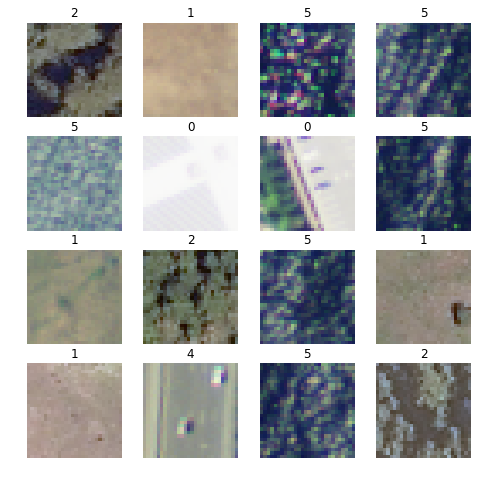

In [86]:

def plot_samples(channel):

  fig = plt.figure(1,figsize=(8,8))
  for i in range(16):
      ax = fig.add_subplot(4,4,i+1)
      img = X_train_array[i,...,:channel]
      ax.imshow(img,cmap='gray')
      ax.set_title(np.argmax(y_train_array[i]),fontsize=12)
      ax.axis('off')

  plt.show()
  
plot_samples(channel=3)

- Channel 4 contains Near-infraded information(pixels)

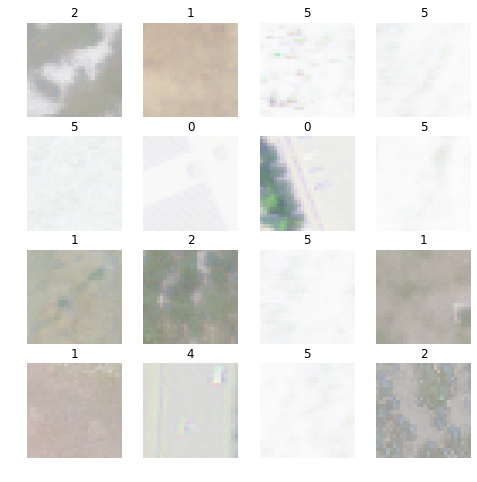

In [84]:
plot_samples(channel=4)

### Decoding classes 

- Encoding Example:

In [0]:
import numpy as np
from keras.utils import to_categorical
data = np.array([1, 5, 3, 8])
data_encoded = to_categorical(data)
print(data)
print(data_encoded)

Using TensorFlow backend.


[1 5 3 8]
[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


- original labels given:

In [162]:
y_train.head(10)

,0,1,2,3,4,5
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
5,1,0,0,0,0,0
6,1,0,0,0,0,0
7,0,0,0,0,0,1
8,0,1,0,0,0,0
9,0,0,1,0,0,0


- In order to decode values, we will use numpy's argmax function, which returns us the index of maximum value for each row

In [163]:
class_ = []

# we use y_train as dataframe

for inx,cols in y_train.iterrows():
  
    #print(cols.to_list())
    class_.append(np.argmax(cols.to_list()))
    
# make DataFrame 
y_train = pd.DataFrame(class_,columns=['class_name'])

print('y_train shape:', y_train.shape)

y_train shape: (3000, 1)


### Check number  of samples for each class 
- classes : (0,1,2,3,4,5)

In [164]:
y_train['class_name'].value_counts()

5    1111
1     659
2     526
3     495
0     147
4      62
Name: class_name, dtype: int64

- Alternativly we can use 'Counter' function as well

In [165]:
from collections import Counter

Counter(class_).most_common()

[(5, 1111), (1, 659), (2, 526), (3, 495), (0, 147), (4, 62)]

### Visualize class distribution

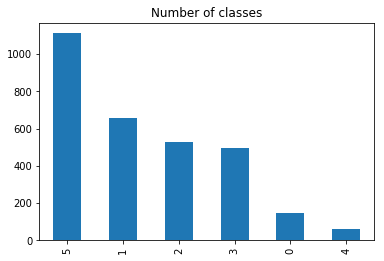

In [169]:
y_train.class_name.value_counts().plot(kind='bar',title='Number of classes')
# plt.tight_layout()
# plt.xticks(range(0,6), y_train.index, fontsize=12)
plt.show()

- As it is seen on the graph, Class '5' has more and '4' has less samples

## Undersampling

- To balance our dataset, we can reduce major classes to minor ones in number

In [0]:
grouped = y_train.groupby('class_name')
y_train_under_sampled = grouped.apply(lambda x: x.sample(grouped.size().min()).reset_index(drop=True))
Counter(y_train_under_sampled['class_name'].values).most_common()

[(0, 24), (1, 24), (2, 24), (3, 24), (4, 24), (5, 24)]

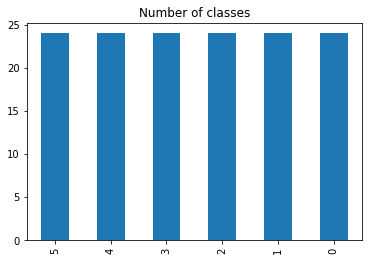

In [0]:
y_train_under_sampled.class_name.value_counts().plot(kind='bar',title='Number of classes')
plt.show()

## Over-sampling

- Oversampling refers augmentation when handling with images
- Following example can be considered as for numerical data over-sampling, since we can fill new samples by mean and variance 

### Let's save first counts for each class 

In [0]:
class_5,class_1,class_3,class_2,class_0,class_4 = y_train.class_name.value_counts()

### Then let's seperate our dataset into every class to apply over-sampling seperately 

In [0]:
y_train_0 = y_train.class_name[y_train.class_name == 0]
y_train_1 = y_train.class_name[y_train.class_name == 1]
y_train_2 = y_train.class_name[y_train.class_name == 2]
y_train_3 = y_train.class_name[y_train.class_name == 3]
y_train_5 = y_train.class_name[y_train.class_name == 5]
y_train_4 = y_train.class_name[y_train.class_name == 4]


### Applying over-sampling for the Class '0' and Class '4' by referring Class '2'

In [0]:
y_train_0 = y_train_0.sample(class_2,replace=True)
y_train_4 = y_train_4.sample(class_2,replace=True)

y_train_over_sampled = pd.concat([y_train_0,y_train_1,y_train_2,y_train_3,y_train_4,y_train_5],axis=0)

### Visualize again

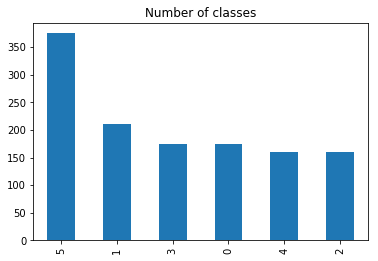

In [0]:

y_train_over_sampled.value_counts().plot(kind='bar',title='Number of classes')
plt.show()

## Image Augmentation

- As for images, we use typical image processing approaches such as flipping, rotating, padding etc.

In [148]:

chosen_idx = np.random.choice(100, replace=False, size=1)

image = X_train_array[chosen_idx,...,:3]
image = np.squeeze(image,axis=0)

print('image_shape:' , image.shape)

image_shape: (28, 28, 3)


### Horizontal Flip

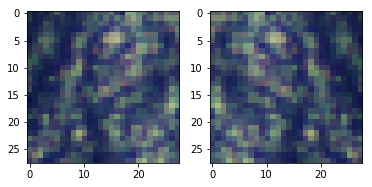

In [149]:
def horizontal_flip(image):
  
    image_hor_flip = image[:, ::-1, :]
    
    plt.subplot(121)
    plt.imshow(image)
        
    plt.subplot(122)
    plt.imshow(image_hor_flip)
    plt.show()
  
horizontal_flip(image)

### Vertical Flip

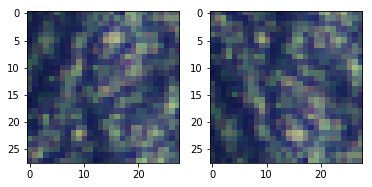

In [150]:
def vertical_flip(image, rate=0.5):
  
    if np.random.rand() < rate:
      
      image_ver_flip = image[::-1, :, :]  
  
      plt.subplot(121)
      plt.imshow(image)

      plt.subplot(122)
      plt.imshow(image_ver_flip)
      plt.show()
    
vertical_flip(image)   

### Random Rotate

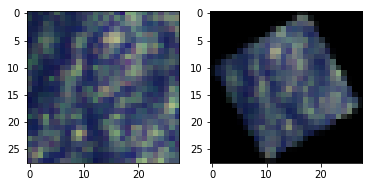

In [151]:
from scipy.ndimage.interpolation import rotate
from imutils import resize


def random_rotation(image, angle_range=(0, 180)):
  
    height, width, _ = image.shape
    angle = np.random.randint(*angle_range)
    image_rotate = rotate(image, angle)
    image_rotate = resize(image_rotate, width,height)
    
    plt.subplot(121)
    plt.imshow(image)

    plt.subplot(122)
    plt.imshow(image_rotate)
    plt.show()

random_rotation(image, angle_range=(0, 180))